# Decision Trees


In [195]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score,precision_score, f1_score, recall_score
from IPython.display import Image  
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
#import pydotplus
import seaborn as sns

In [196]:

df= pd.read_csv('./data/customer_data.csv')
df

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,0.0,59004779,4.0,1277.0,1.0,113000.0,2.0,8.0,-1.0,100.0,3.0,341759.0,207.173840
1,0.0,58990862,7.0,1298.0,1.0,110000.0,2.0,11.0,-1.0,101.0,5.0,72001.0,NaN
2,1.0,58995168,7.0,1335.5,1.0,151000.0,2.0,11.0,5.0,110.0,3.0,60084.0,NaN
3,0.0,54987320,7.0,NaN,2.0,59000.0,2.0,11.0,5.0,108.0,4.0,450081.0,197.403141
4,0.0,59005995,6.0,1217.0,3.0,56000.0,2.0,6.0,-1.0,100.0,3.0,60091.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,0.0,58988196,5.0,1289.0,1.0,173000.0,2.0,15.0,5.0,112.0,3.0,350702.0,NaN
1120,0.0,58987926,5.0,NaN,2.0,50000.0,2.0,15.0,5.0,108.0,4.0,450000.0,NaN
1121,0.0,58995381,7.0,1220.0,3.0,76000.0,2.0,11.0,2.0,90.0,5.0,71002.0,NaN
1122,0.0,58998054,4.0,1250.0,3.0,137000.0,2.0,8.0,5.0,90.0,5.0,72000.0,NaN


### Q1&2 missing data 

In [197]:
df=df[df.isna().sum(axis=1)<=7]
print(f" {len(df)} rows left") 


 1112 rows left


In [198]:
# remove bad features 
col2remove = df.columns[df.isna().sum(axis=0)>len(df)/2]
print(f"columns {list(col2remove)} have more than 50% of NAs --> removed")
df = df.drop(columns=list(col2remove))
df

columns ['fea_11'] have more than 50% of NAs --> removed


,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10
0,0.0,59004779,4.0,1277.0,1.0,113000.0,2.0,8.0,-1.0,100.0,3.0,341759.0
1,0.0,58990862,7.0,1298.0,1.0,110000.0,2.0,11.0,-1.0,101.0,5.0,72001.0
2,1.0,58995168,7.0,1335.5,1.0,151000.0,2.0,11.0,5.0,110.0,3.0,60084.0
3,0.0,54987320,7.0,NaN,2.0,59000.0,2.0,11.0,5.0,108.0,4.0,450081.0
4,0.0,59005995,6.0,1217.0,3.0,56000.0,2.0,6.0,-1.0,100.0,3.0,60091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1119,0.0,58988196,5.0,1289.0,1.0,173000.0,2.0,15.0,5.0,112.0,3.0,350702.0
1120,0.0,58987926,5.0,NaN,2.0,50000.0,2.0,15.0,5.0,108.0,4.0,450000.0
1121,0.0,58995381,7.0,1220.0,3.0,76000.0,2.0,11.0,2.0,90.0,5.0,71002.0
1122,0.0,58998054,4.0,1250.0,3.0,137000.0,2.0,8.0,5.0,90.0,5.0,72000.0


In [199]:
# imputation with feature mean 
df= df.fillna(df.mean(axis=0))
df.std(axis=0)

label     3.960092e-01
id        1.811651e+06
fea_1     1.378658e+00
fea_2     4.810425e+01
fea_3     8.781669e-01
fea_4     8.868626e+04
fea_5     2.584545e-01
fea_6     2.668490e+00
fea_7     2.968887e+00
fea_8     1.195106e+01
fea_9     8.545953e-01
fea_10    1.525773e+05
dtype: float64

### Q3: best criterion for decision tree

In [200]:
y,X= df['label'].astype(int), df[[x for x in df.columns if x!='label']].astype(float)
X

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10
0,59004779.0,4.0,1277.000000,1.0,113000.0,2.0,8.0,-1.0,100.0,3.0,341759.0
1,58990862.0,7.0,1298.000000,1.0,110000.0,2.0,11.0,-1.0,101.0,5.0,72001.0
2,58995168.0,7.0,1335.500000,1.0,151000.0,2.0,11.0,5.0,110.0,3.0,60084.0
3,54987320.0,7.0,1284.104361,2.0,59000.0,2.0,11.0,5.0,108.0,4.0,450081.0
4,59005995.0,6.0,1217.000000,3.0,56000.0,2.0,6.0,-1.0,100.0,3.0,60091.0
...,...,...,...,...,...,...,...,...,...,...,...
1119,58988196.0,5.0,1289.000000,1.0,173000.0,2.0,15.0,5.0,112.0,3.0,350702.0
1120,58987926.0,5.0,1284.104361,2.0,50000.0,2.0,15.0,5.0,108.0,4.0,450000.0
1121,58995381.0,7.0,1220.000000,3.0,76000.0,2.0,11.0,2.0,90.0,5.0,71002.0
1122,58998054.0,4.0,1250.000000,3.0,137000.0,2.0,8.0,5.0,90.0,5.0,72000.0


In [221]:
# train, valid, test split
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)

In [222]:
# test with entropy 
clf1 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 10)
clf=clf1
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_valid = clf.predict(X_valid)
print ('train accuracy = ' + str(accuracy_score(y_train, y_pred_train)))
print ('validation test accuracy = ' + str(accuracy_score(y_valid, y_pred_valid)))

train accuracy = 0.8284106891701828
validation test accuracy = 0.7528089887640449


In [223]:
# test with gini 
clf2 = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 10)
clf=clf2
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_valid = clf.predict(X_valid)
print ('train accuracy = ' + str(accuracy_score(y_train, y_pred_train)))
print ('validation valid accuracy = ' + str(accuracy_score(y_valid, y_pred_valid)))

train accuracy = 0.8312236286919831
validation valid accuracy = 0.7640449438202247


the entropy citerion seems to provide the best accuracy on training set 

In [224]:
# test best criterion on test set '
y_pred = clf2.predict(X_test)
print ('test accuracy = ' + str(accuracy_score(y_test, y_pred)))

test accuracy = 0.7847533632286996


### Q4: iterate on min split 

In [225]:
dffit=pd.DataFrame(columns=['split','train','valid'])
for s in [2,5,10,20]:
    clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = s)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_valid = clf.predict(X_valid)
    acctrain = (accuracy_score(y_train, y_pred_train))
    accvalid = (accuracy_score(y_valid, y_pred_valid))
    dffit= pd.concat([dffit, pd.DataFrame({'split':[s],'train':[acctrain],'valid':[accvalid]})],ignore_index=True)

dffit.style.format({'split':'{:2d}','train':'{:2.1%}','valid':'{:2.1%}'})

,split,train,valid
0,2,95.5%,70.2%
1,5,87.9%,74.2%
2,10,82.8%,75.3%
3,20,80.0%,80.9%


The 20 split gives the best result

### Q5: training set length 

In [226]:
dffit=pd.DataFrame(columns=['length','train','valid'])
Xt, yt = X_train, y_train
for s in  [50, 100, 200, 400, 600, 704]:
    clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 20)
    X_train, y_train = Xt[:s], yt[:s]
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_valid = clf.predict(X_valid)
    acctrain = (accuracy_score(y_train, y_pred_train))
    accvalid = (accuracy_score(y_valid, y_pred_valid))
    dffit= pd.concat([dffit, pd.DataFrame({'length':[s],'train':[acctrain],'valid':[accvalid]})],ignore_index=True)

dffit.style.format({'length':'{:2d}','train':'{:2.1%}','valid':'{:2.1%}'})

,length,train,valid
0,50,76.0%,82.6%
1,100,78.0%,82.6%
2,200,81.5%,82.6%
3,400,81.2%,80.3%
4,600,82.3%,77.5%
5,704,80.3%,80.9%


the 2 first lines make no sense: the validation is higher than train set just by sheer luck
results start to be significative towards the end, and the last data length seem to be the best 

In [227]:
# test set
clf = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 20)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_valid = clf.predict(X_valid)
y_pred_test = clf.predict(X_test)
acctrain = (accuracy_score(y_train, y_pred_train))
accvalid = (accuracy_score(y_valid, y_pred_valid))
print ('train accuracy = ' + str(accuracy_score(y_train, y_pred_train)))
print ('validation valid accuracy = ' + str(accuracy_score(y_valid, y_pred_valid)))
print ('validation test accuracy = ' + str(accuracy_score(y_test, y_pred_test)))

train accuracy = 0.8025568181818182
validation valid accuracy = 0.8089887640449438
validation test accuracy = 0.8251121076233184


### Q6: confusion matrix

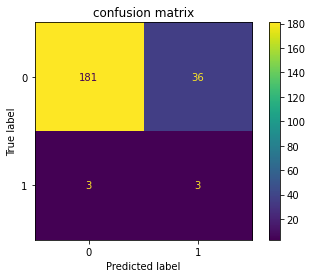

In [228]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_pred_test,y_test)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=clf.classes_)
cmd.plot()
plt.title("confusion matrix")
plt.show()

### Q6b : display tree

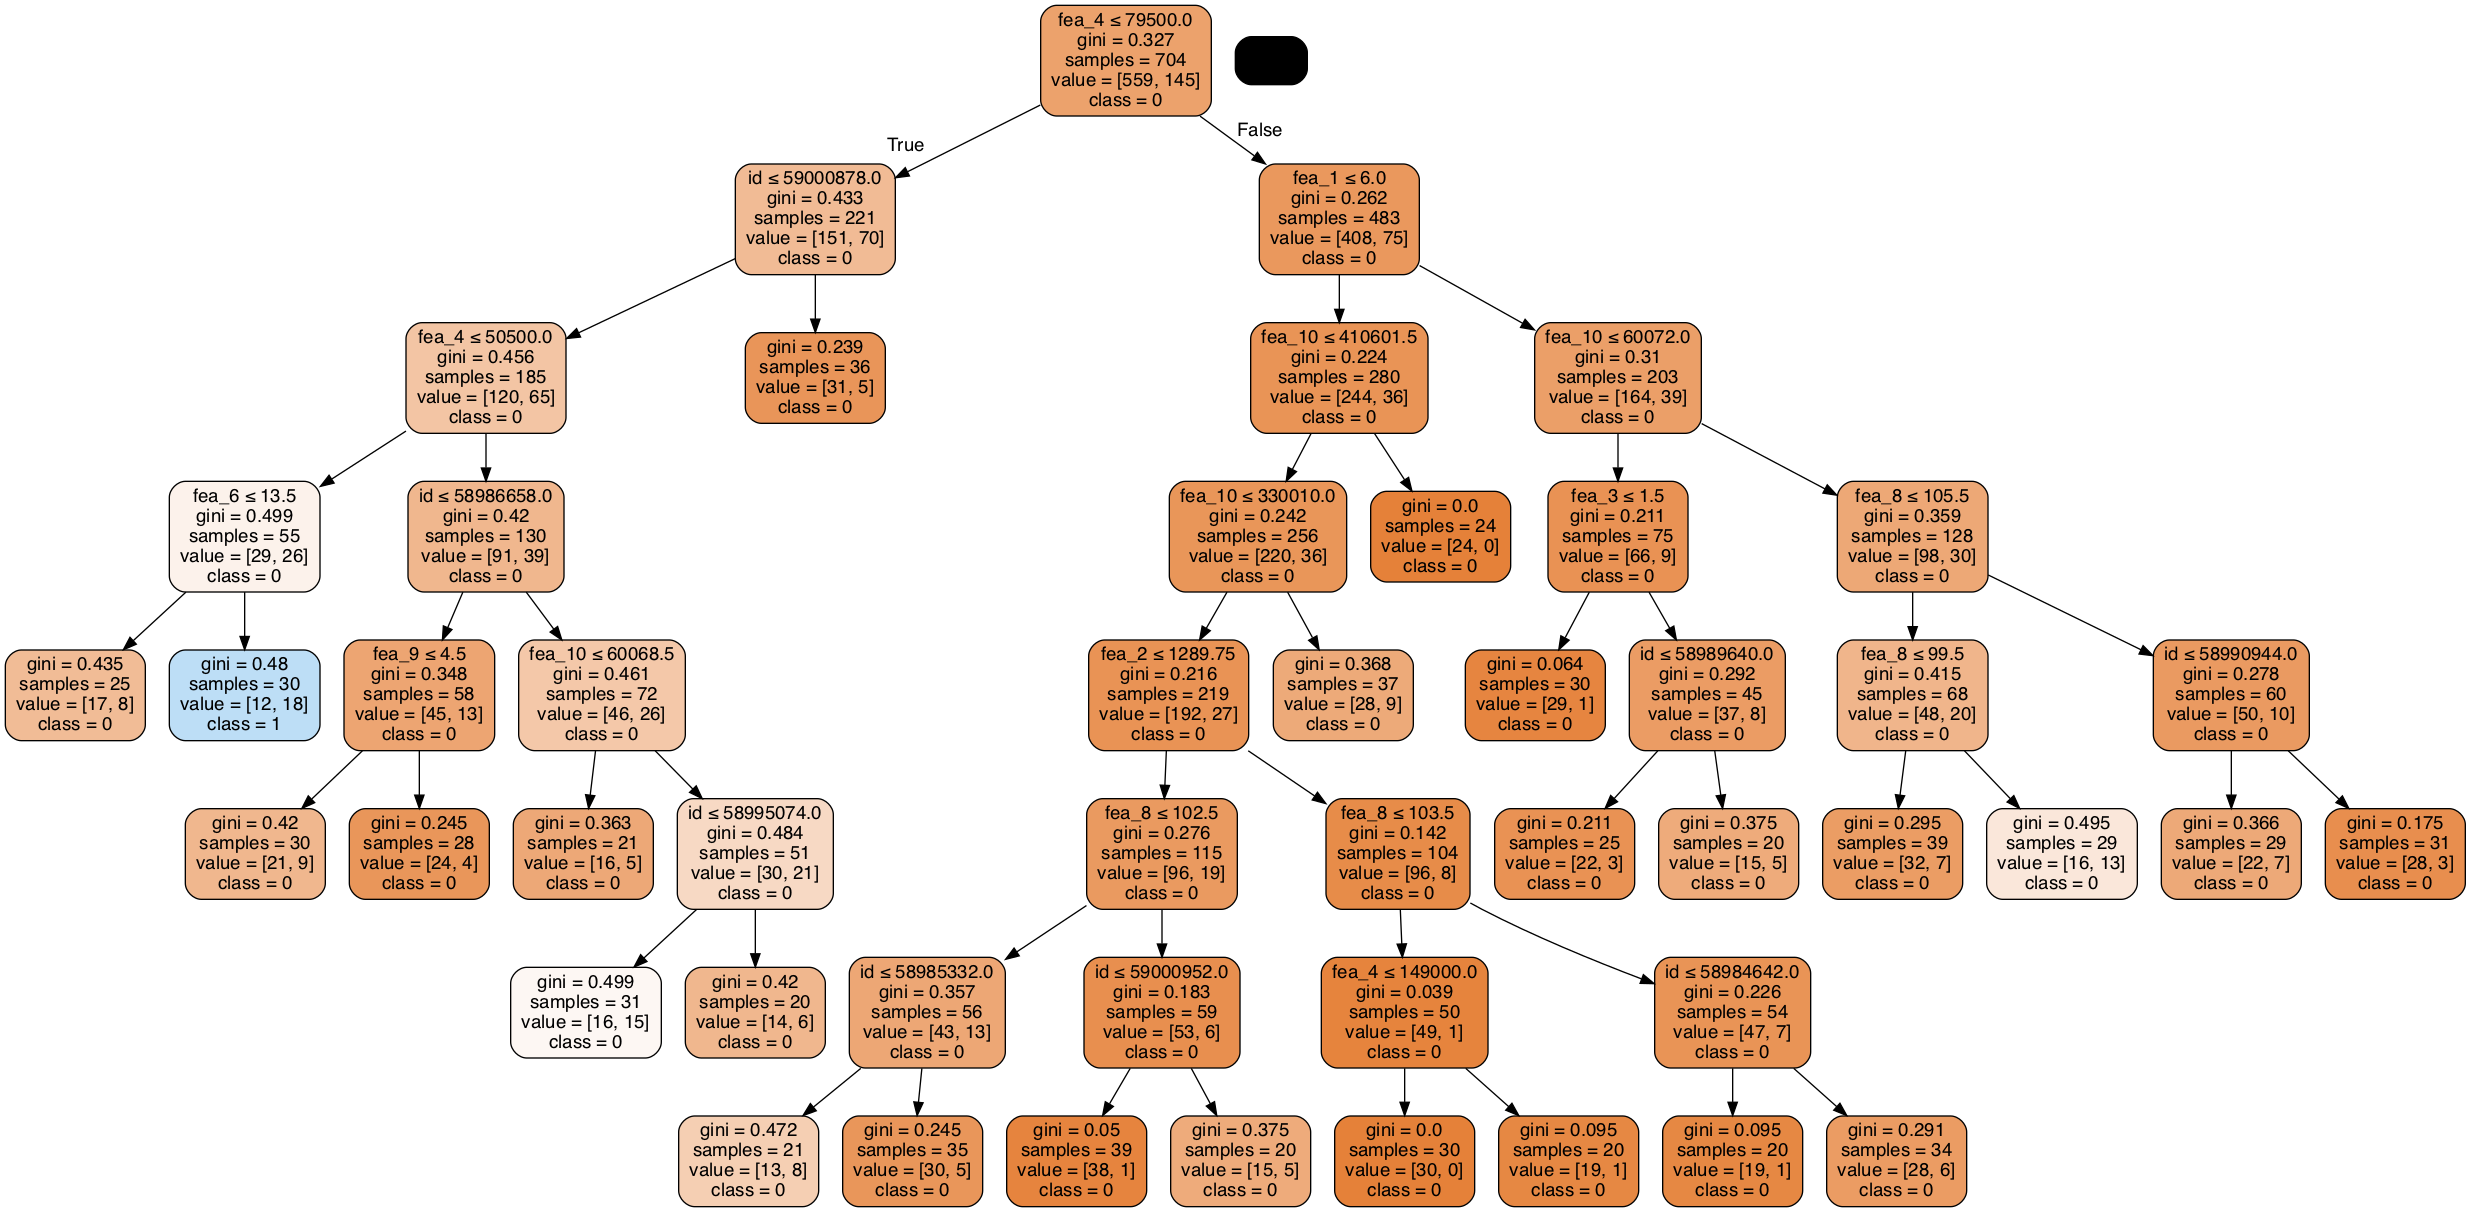

In [229]:
import pydotplus
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['0','1'],
                         filled=True, rounded=True,
                         special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [230]:
print(tree.export_text(clf))
#feature_0: Sepal Length and feature_1: Sepal Width

|--- feature_4 <= 79500.00
|   |--- feature_0 <= 59000878.00
|   |   |--- feature_4 <= 50500.00
|   |   |   |--- feature_6 <= 13.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  13.50
|   |   |   |   |--- class: 1
|   |   |--- feature_4 >  50500.00
|   |   |   |--- feature_0 <= 58986658.00
|   |   |   |   |--- feature_9 <= 4.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_9 >  4.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  58986658.00
|   |   |   |   |--- feature_10 <= 60068.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_10 >  60068.50
|   |   |   |   |   |--- feature_0 <= 58995074.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  58995074.00
|   |   |   |   |   |   |--- class: 0
|   |--- feature_0 >  59000878.00
|   |   |--- class: 0
|--- feature_4 >  79500.00
|   |--- feature_1 <= 6.00
|   |   |--- feature_10 <= 410601.50
|   |   |   |--- feature_10 <= 330010.00
|   |   |   |   |--- 

# kNN

### Q7

In [231]:
# normalization bsed on Train and valid datasets
idx = [x for x in X.index if x not in X_test.index]
Xtv = X.loc[idx,:]
ytv = y[idx]
X_train = ((X_train - Xtv.mean())/ Xtv.std())
X_valid = ((X_valid - Xtv.mean())/ Xtv.std())
X_test = ((X_test - Xtv.mean())/ Xtv.std())
Xtv = ((Xtv - Xtv.mean())/ Xtv.std())


In [232]:
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(Xtv, ytv)
y_test_pred= clf.predict(X_test)
print ('validation test accuracy = ' + str(accuracy_score(y_test, y_pred_test)))
    

validation test accuracy = 0.8251121076233184


### Q8: valid different distances

In [233]:
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier

for dist in [1,2,5,10,100]:
    clf = KNeighborsClassifier(n_neighbors=3,p=dist)
    clf.fit(X_train, y_train)
    y_pred_train= clf.predict(X_train)
    y_pred_valid= clf.predict(X_valid)
    print('p='+str(dist)+':')
    print ('train accuracy = ' + str(accuracy_score(y_train, y_pred_train)))
    print ('validation accuracy = ' + str(accuracy_score(y_valid, y_pred_valid))+'\n')

p=1:
train accuracy = 0.8295454545454546
validation accuracy = 0.7191011235955056

p=2:
train accuracy = 0.8309659090909091
validation accuracy = 0.7584269662921348

p=5:
train accuracy = 0.8423295454545454
validation accuracy = 0.7528089887640449

p=10:
train accuracy = 0.8366477272727273
validation accuracy = 0.7528089887640449

p=100:
train accuracy = 0.8465909090909091
validation accuracy = 0.7528089887640449



linf seems to be the best distance

In [234]:
# evaluation on test set
# note: the last model is the best so no need to recalculate
y_pred_test= clf.predict(X_test)
print ('test accuracy = ' + str(accuracy_score(y_test, y_pred_test)))

test accuracy = 0.7757847533632287


### Q9: iterate on nb of neighbors

In [235]:
for k in [1,3,5,7,9]:
    clf = KNeighborsClassifier(n_neighbors=k,metric='chebyshev')
    clf.fit(X_train, y_train)
    y_pred_train= clf.predict(X_train)
    y_pred_valid= clf.predict(X_valid)
    print(str(k)+' neighbors:')
    print ( 'train accuracy = ' + str(accuracy_score(y_train, y_pred_train)))
    y_test_pred= clf.predict(X_test)
    print ('validation accuracy = ' + str(accuracy_score(y_valid, y_pred_valid))+'\n')

1 neighbors:
train accuracy = 1.0
validation accuracy = 0.6797752808988764

3 neighbors:
train accuracy = 0.8451704545454546
validation accuracy = 0.7471910112359551

5 neighbors:
train accuracy = 0.8039772727272727
validation accuracy = 0.7696629213483146

7 neighbors:
train accuracy = 0.8011363636363636
validation accuracy = 0.7921348314606742

9 neighbors:
train accuracy = 0.796875
validation accuracy = 0.8146067415730337



9 neighbors seem to be the optimal with Chebyshev

### Q10: partial dataset

In [236]:
dffit=pd.DataFrame(columns=['length','train','valid'])
Xt, yt = X_train, y_train
for s in  [50, 100, 200, 400, 600, 704]:
    clf = KNeighborsClassifier(n_neighbors=3,metric='chebyshev')
    X_train, y_train = Xt[:s], yt[:s]
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_valid = clf.predict(X_valid)
    acctrain = (accuracy_score(y_train, y_pred_train))
    accvalid = (accuracy_score(y_valid, y_pred_valid))
    dffit= pd.concat([dffit, pd.DataFrame({'length':[s],'train':[acctrain],'valid':[accvalid]})],ignore_index=True)

dffit.style.format({'length':'{:2d}','train':'{:2.1%}','valid':'{:2.1%}'})


,length,train,valid
0,50,78.0%,78.7%
1,100,87.0%,79.2%
2,200,82.5%,80.9%
3,400,83.0%,74.2%
4,600,84.8%,74.2%
5,704,84.5%,74.7%


/Users/xavier/opt/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


<AxesSubplot:xlabel='length'>

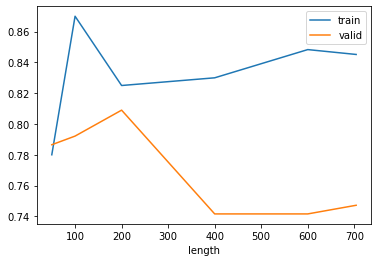

In [237]:
dffit.set_index('length')[['train','valid']].plot()

the optimal length seems to be aroiund 200 points

### Q11: 

In [259]:
#np.sum(y_test*y_pred_test)/(np.sum(y_test*y_pred_test)+np.sum((1-y_test)*(y_pred_test)))

train accuracy = 0.84375
train precision = 0.7272727272727273
test accuracy = 0.7757847533632287
test precision = 0.17647058823529413
test recall = 0.07692307692307693
test f1 = 0.10714285714285716
test auc = 0.5004180602006688


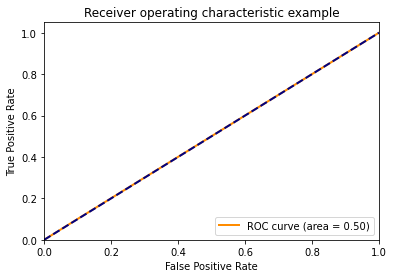

In [252]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
k=3
clf = KNeighborsClassifier(n_neighbors=k,metric='chebyshev')
clf.fit(Xtv, ytv)

y_pred_train = clf.predict(X_train)
print ( 'train accuracy = ' + str(accuracy_score(y_train, y_pred_train)))
print ( 'train precision = ' + str(precision_score(y_train, y_pred_train)))

y_pred_test = clf.predict(X_test)
print ( 'test accuracy = ' + str(accuracy_score(y_test, y_pred_test)))
print ( 'test precision = ' + str(precision_score(y_test, y_pred_test)))
print ( 'test recall = ' + str(recall_score(y_test, y_pred_test)))
print ( 'test f1 = ' + str(f1_score(y_test, y_pred_test)))
#print(roc_auc_score(y_train, y_pred_train))

fpr, tpr, _ = roc_curve(y_test, y_pred_test)
print ( 'test auc = ' + str(auc(fpr, tpr)))

plt.figure()
lw = 2
plt.plot(    fpr,    tpr,    color="darkorange",    lw=lw,    label="ROC curve (area = %0.2f)" % auc(fpr, tpr),)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


train accuracy = 0.7940340909090909
train precision = 0.5
test accuracy = 0.820627802690583
test precision = 0.0
test recall = 0.0
test f1 = 0.0
test auc = 0.49728260869565216


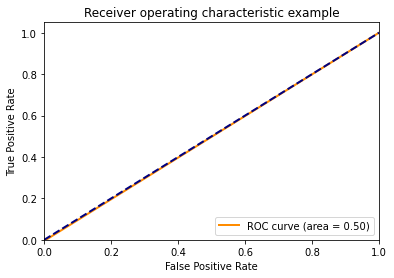

In [260]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
k=7
clf = KNeighborsClassifier(n_neighbors=k,metric='chebyshev')
clf.fit(Xtv, ytv)

y_pred_train = clf.predict(X_train)
print ( 'train accuracy = ' + str(accuracy_score(y_train, y_pred_train)))
print ( 'train precision = ' + str(precision_score(y_train, y_pred_train)))

y_pred_test = clf.predict(X_test)
print ( 'test accuracy = ' + str(accuracy_score(y_test, y_pred_test)))
print ( 'test precision = ' + str(precision_score(y_test, y_pred_test)))
print ( 'test recall = ' + str(recall_score(y_test, y_pred_test)))
print ( 'test f1 = ' + str(f1_score(y_test, y_pred_test)))
#print(roc_auc_score(y_train, y_pred_train))

fpr, tpr, _ = roc_curve(y_test, y_pred_test)
print ( 'test auc = ' + str(auc(fpr, tpr)))

plt.figure()
lw = 2
plt.plot(    fpr,    tpr,    color="darkorange",    lw=lw,    label="ROC curve (area = %0.2f)" % auc(fpr, tpr),)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


Both models show a poor performance: they are not detecting positives better than a random model 
The model with 7 neighbors seems to be slightly worse than the one with 3 neighbors 